PerceptionEstimator Kapitel 4.7

[1 0 0]: 0 -> 0
[1 0 1]: 1 -> 1
[1 1 0]: 1 -> 1
[1 1 1]: 1 -> 1


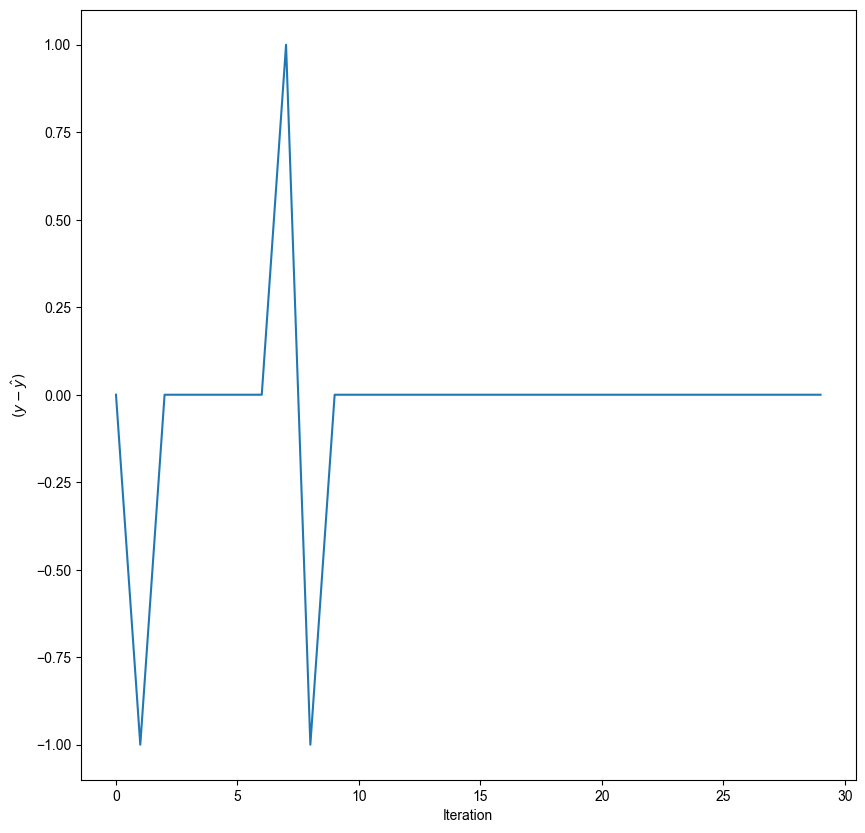

In [1]:
# Code
import warnings
warnings.filterwarnings('ignore')
# ## Perceptron: scikit-learn Estimator und Predictor

# #### Listing 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9

# Numpy hilft uns mit den arrays
import numpy as np
# Grafische Darstellung
import matplotlib.pyplot as plt
# Das sind unsere Basisklassen
from sklearn.base import BaseEstimator, ClassifierMixin
# Prüfroutinen für die Konsistenz der Daten, etc.
from sklearn.utils.validation import check_X_y, check_is_fitted, check_random_state
# Puffern der unterschiedlichen Zielwerte
from sklearn.utils.multiclass import unique_labels
# Ganz wichtig, sonst wird der Plot nicht angezeigt
# %matplotlib inline

# Unser Estimator, passend bezeichnet und die Basisklassen
class PerceptronEstimator(BaseEstimator, ClassifierMixin):
    # Initialisierung
    def __init__(self, n_iterations=20, random_state=None):
        """ Initialisierung der Objekte
        n_iterations: Anzahl der Iterationen für das Lernen
        random_state_seed: Um Wiederholbarkeit zu garantieren sollte ein
                      numpy.random.RandomState Objekt konstruiert werden,
                      das mit random_state_seed Seed initialisiert wurde
        """
        # Die Anzahl der Iterationen
        self.n_iterations = n_iterations
        # Die Seed für den Zufallsgenerator
        self.random_state = random_state
        # Die Fehler im Lernprozeß für den Plot gepuffert
        self.errors = []

    # Eine Stufenfunktion, benannt nach dem Mathematiker und Physiker
    # Oliver Heaviside
    def heaviside(self, x):
        """ Eine Stufenfunktion
        x: Der Wert für den die Stufenfunktion ausgewertet wird
        """
        if x < 0:
            result = 0
        else:
            result = 1
        return result

    # Lernen
    def fit(self, X=None, y=None ):
        """ Trainieren
        X: Array-ähnliche Struktur mit [N,D], wobei
           N = Zeilen = Anzahl der Lernbeispiele und
           D = Spalten = Anzahl der Features
        y: Array mit [N], mit N so wie oben
        """
        # Erzeugung des Zufallsgenerators (RNG)
        random_state = check_random_state(self.random_state)
        # Gewichtinitialisierung
        # np.size(.,1) = Anzahl der Spalten
        self.w = random_state.random_sample(np.size(X,1))
        # Prüfe, ob X und y die korrekte shape haben: X.shape[0] = y.shape[0]
        X, y = check_X_y(X, y)
        # Die eindeutigen Zielwerte speichern
        self.classes_ = unique_labels(y)
        # Lerndaten für spätere Prüfung in Methode predict speichern
        self.X_ = X
        self.y_ = y
        # Lernen
        for i in range(self.n_iterations):
            # zufälliges durchwürfeln, für batch size = 1
            # np.size(.,0) = Anzahl der Zeilen
            rand_index = random_state.randint(0,np.size(X,0))
            # Ein zufälliger Inputvektor
            x_ = X[rand_index]
            # Ein dazu passender Output
            y_ = y[rand_index]
            # Den errechneten Output ermitteln:
            # Gewichtete Summe mit nachgelagerter Stufenfunktion
            y_hat = self.heaviside(np.dot(self.w, x_))
            # Fehler berechnen als Differenz zwischen gewünschtem und
            # aktuellem Output
            error = y_ - y_hat
            # Fehler sammeln für die Ausgabe
            self.errors.append(error)
            # Gewichtsanpassung = Das Lernen
            self.w += error * x_
            # Rückgabe des Estimators für verknüpfte Aufrufe
        return self

    # Auswerten
    def predict(self, x):
        """ Auswerten eines Vektors
        x: Ein Test Inputvektor
        """
        # Prüfen, ob fit berereits aufgerufen wurde
        # Die Daten wurden in der Methode fit gesetzt
        check_is_fitted(self, ['X_', 'y_'])
        # Auswerten, Forward Path
        y_hat = self.heaviside(np.dot(self.w,x))

        return y_hat

    # Plot
    def plot(self):
        """ Ausgabe des Fehlers
        Die im Fehlerarray gespeicherten Fehler als Grafik ausgeben
        """
        # Figure-Nummern Start
        fignr = 1
        # Druckgröße in inch
        plt.figure(fignr,figsize=(10,10))
        # Ausgabe Fehler als Plot
        plt.plot(self.errors)
        # Raster
        plt.style.use('seaborn-v0_8-whitegrid')
        # Labels
        plt.xlabel('Iteration')
        plt.ylabel(r"$(y - \hat y)$")

def main():
    # Trainingsdaten
    X = np.array([[1,0,0], [1,0,1], [1,1,0],[1,1,1]])
    y = np.array([0,1,1,1])
    # Lernen
    Perceptron = PerceptronEstimator(30,10)
    Perceptron.fit(X,y)
    # Auswertung
    for index, x in enumerate(X):
        p = Perceptron.predict(x)
        print("{}: {} -> {}".format(x, y[index],p))
    # Graph ausgeben
    Perceptron.plot()

main()